In [2]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

##Задача 1
p(x) = 0.3N(-4, 2) + 0.7N(3, 6)

In [ ]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]


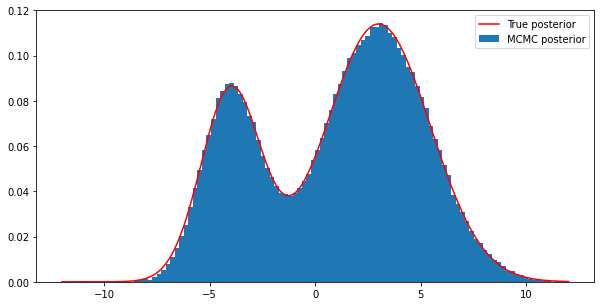

In [ ]:
def value(x, **kwargs):
    return 0.3*1/(sqrt(2*2*np.pi))*np.exp(-(x + 4)**2/(2*2)) + 0.7*1/(sqrt(2*6*np.pi))*np.exp(-(x - 3)**2/(2*6))

def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

z = metroplis(0, value, proposal, 300000,sigma = 0.4)

x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.hist(z, bins = 100,density=True, label='MCMC posterior')
plt.plot(x, y,label='True posterior', c='red')
plt.legend()
plt.show()


##Задача 2
* Оценить  ${\rm E} n(\xi)$ для графа 10х10

In [17]:
n = 10
G = np.zeros((n+2, n+2),dtype=int)
k = 100000
i = 0
sum_1 = np.zeros(k)

while i < k:
    x, y = np.random.randint(1, n+1, 2)
    if((np.sum([G[x + 1, y], G[x, y + 1], G[x - 1, y], G[x, y - 1]]) == 0)or(G[x,y] ==1)):
            G[x, y] = np.random.randint(2)
    sum_1[i] = np.sum(G)
    i+=1
E = np.mean(sum_1)
print(E)

23.63088


* Построить график распределеиня $n(\xi)$

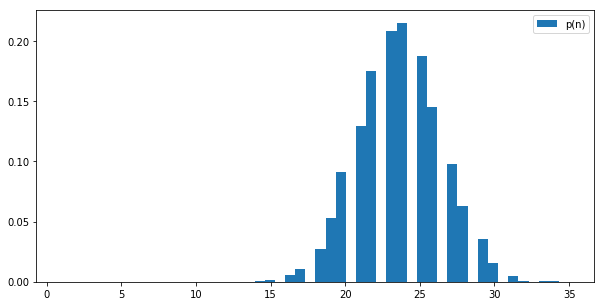

In [23]:
fig, ax = plt.subplots(1, figsize=(10, 5))
plt.hist(sum_1, bins = 50,density=True, label='p(n)')
plt.legend()
plt.show()